In [12]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sys
sys.path.insert(0, '../Imitator')
from plot_helper import * 

colors = [
    "tab:blue",
    "tab:orange",
    "tab:green",
    "tab:red",
    "tab:purple",
    "tab:brown",
    "tab:pink",
]

# Load Data and plot Bars

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


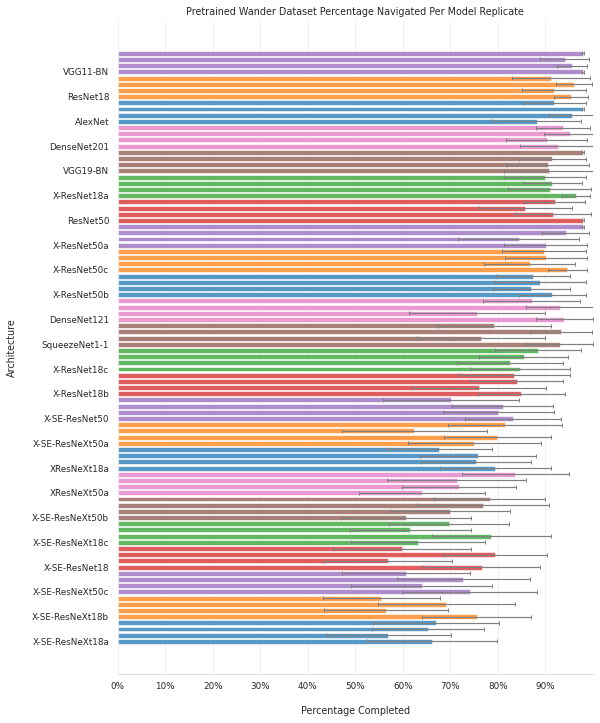

In [31]:
# -1) Move any csv file into your Data directory 
# 0) Specify Data directory for the models
data_dir = "/raid/clark/summer2021/datasets/corrected-wander-full/data"

# 1) Specify the Dataset
df = pd.read_csv("wander_pre/wander_pre_percentage.csv", index_col=0)
columns = list(df.columns)
mazes = columns[1:-3]
df = df.assign(clean_names=list(map(get_network_name, list(df["Network"]))))

# 2) Get extra Pretrained/Not Pretrained Data
avg_valid = merge_loss_data(data_dir, df, "valid_loss", "pretrained", True)
replicate_valid = merge_loss_data(data_dir, df, "valid_loss", "pretrained", False)
avg_train = merge_loss_data(data_dir, df, "train_loss", "pretrained", True)
replicate_train = merge_loss_data(data_dir, df, "train_loss", "pretrained", False)
avg_accuracy = merge_loss_data(data_dir, df, "accuracy", "pretrained", True)
df = pd.merge(df, avg_valid, on="clean_names")
df = df.sort_values(by=['mean_completion'])

# 3) Pass in "df" into the function, plot_bars()
ax = plot_bars(df, "Completion")
plt.gcf().subplots_adjust(left=0.35)
ax.set_title("Pretrained Wander Dataset Percentage Navigated Per Model Replicate");

(array([ 60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

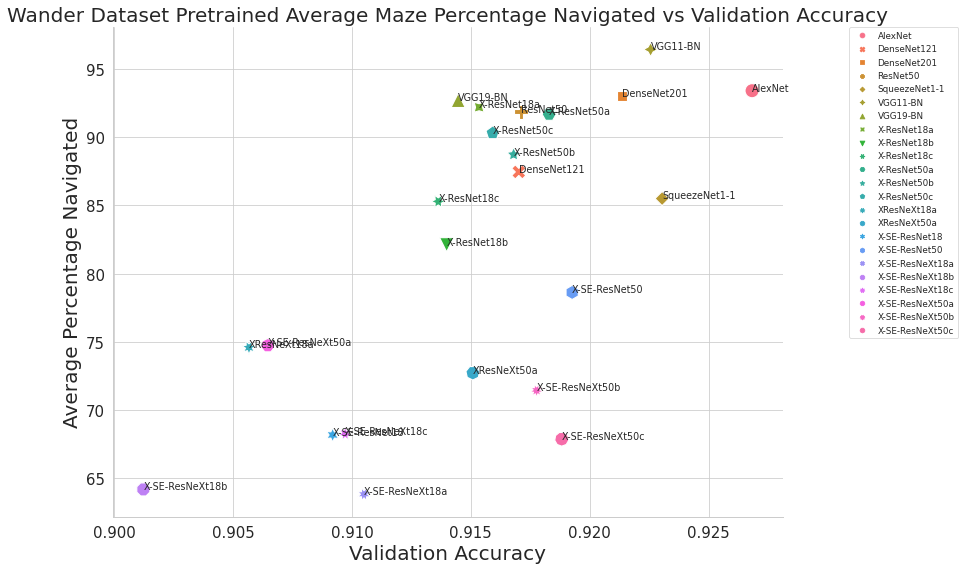

In [32]:
ax = plot_average_scatter(avg_accuracy[avg_accuracy.clean_names != "ResNet18"])
ax.title("Wander Dataset Pretrained Average Maze Percentage Navigated vs Validation Accuracy", size=20);
ax.xlabel("Validation Accuracy", size=20)
ax.ylabel("Average Percentage Navigated", size=20)
ax.xticks(size=15)
ax.yticks(size=15)

(array([ 60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

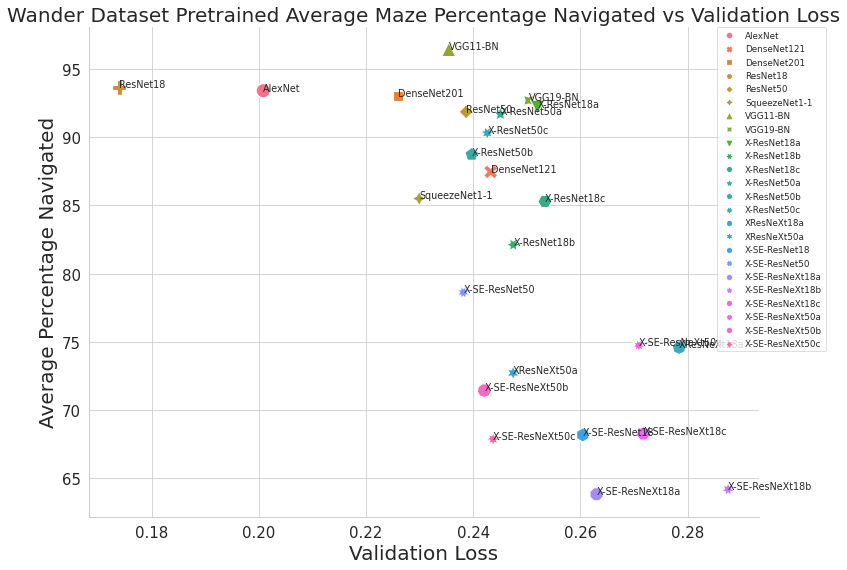

In [33]:
# The other DataFrames like "avg_valid" can be passed into "plot_average_scatter"()
ax = plot_average_scatter(avg_valid)
ax.title("Wander Dataset Pretrained Average Maze Percentage Navigated vs Validation Loss", size=20);
ax.xlabel("Validation Loss", size=20)
ax.ylabel("Average Percentage Navigated", size=20)
ax.xticks(size=15)
ax.yticks(size=15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


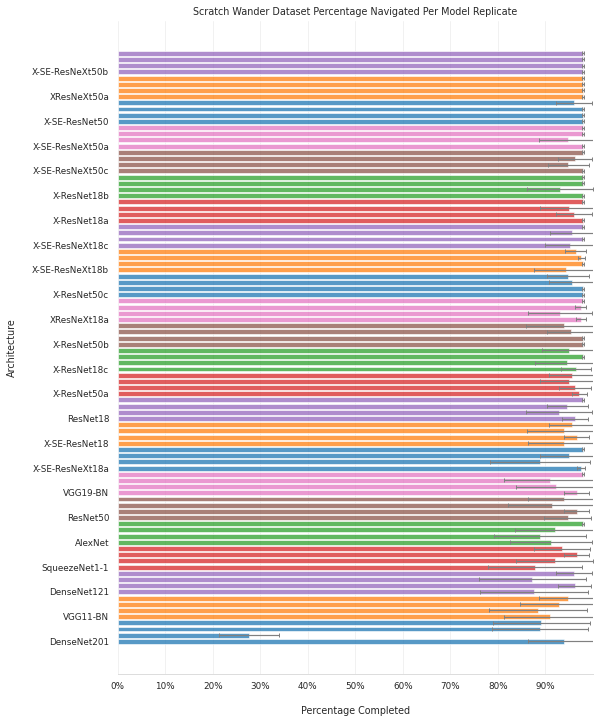

In [28]:
df = pd.read_csv("wander_notpretrained/wander_npre_percentage.csv", index_col=0)
columns = list(df.columns)
mazes = columns[1:-3]
df = df.assign(clean_names=list(map(get_network_name, list(df["Network"]))))
avg_valid = merge_loss_data(data_dir, df, "valid_loss", "notpretrained", True)
replicate_valid = merge_loss_data(data_dir, df, "valid_loss", "notpretrained", False)
avg_train = merge_loss_data(data_dir, df, "train_loss", "notpretrained", True)
replicate_train = merge_loss_data(data_dir, df, "train_loss", "notpretrained", False)
avg_accuracy = merge_loss_data(data_dir, df, "accuracy", "notpretrained", True)
df = pd.merge(df, avg_valid, on="clean_names")
df = df.sort_values(by=['mean_completion'])

%load_ext autoreload
%autoreload 2
ax = plot_bars(df, "Completion")
plt.gcf().subplots_adjust(left=0.35)
ax.set_title("Scratch Wander Dataset Percentage Navigated Per Model Replicate");

(array([ 70.,  75.,  80.,  85.,  90.,  95., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

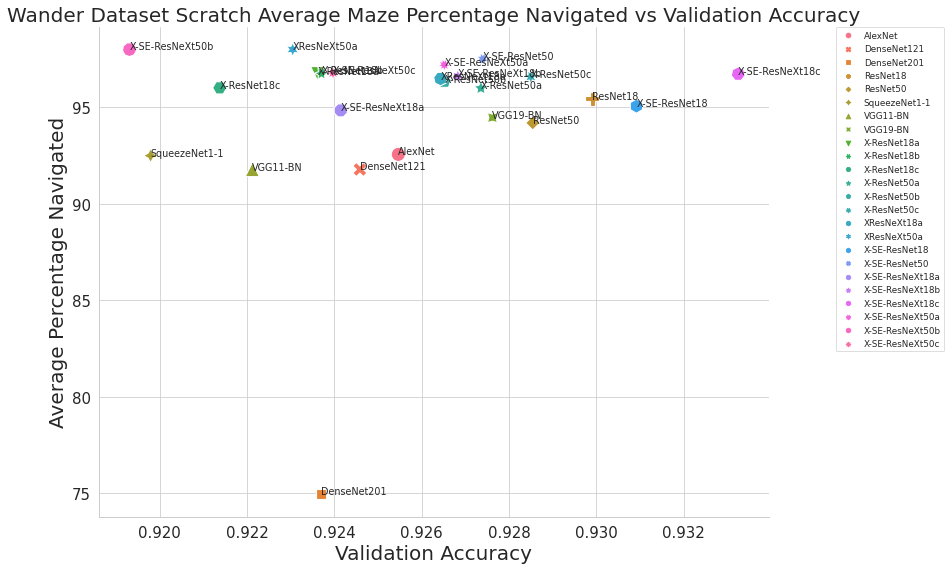

In [29]:
ax = plot_average_scatter(avg_accuracy)
ax.title("Wander Dataset Scratch Average Maze Percentage Navigated vs Validation Accuracy", size=20);
ax.xlabel("Validation Accuracy", size=20)
ax.ylabel("Average Percentage Navigated", size=20)
ax.xticks(size=15)
ax.yticks(size=15)

(array([ 70.,  75.,  80.,  85.,  90.,  95., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

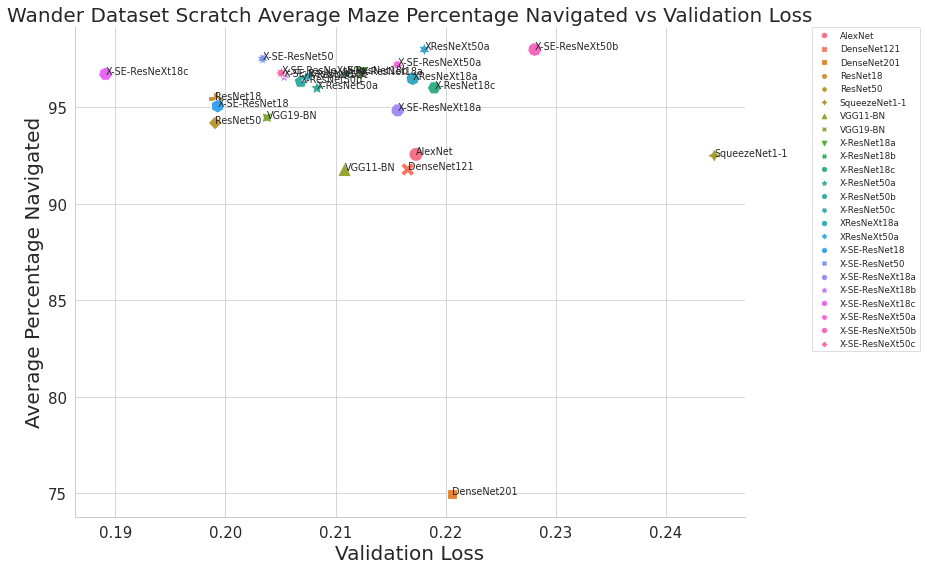

In [30]:
ax = plot_average_scatter(avg_valid)
ax.title("Wander Dataset Scratch Average Maze Percentage Navigated vs Validation Loss", size=20);
ax.xlabel("Validation Loss", size=20)
ax.ylabel("Average Percentage Navigated", size=20)
ax.xticks(size=15)
ax.yticks(size=15)

In [41]:
pd.read_csv("wander_cmd/cmd_percentage.csv", index_col=0)

,Network,maze_01.txt,maze_02.txt,maze_03.txt,maze_04.txt,maze_05.txt,maze_06.txt,maze_07.txt,maze_08.txt,maze_09.txt,...,maze_14.txt,maze_15.txt,maze_16.txt,maze_17.txt,maze_18.txt,maze_19.txt,maze_20.txt,std,mean,error
0,classification-alexnet-pretrained-0.pth,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,2.272727,1.923077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.768882,0.313957,0.336977
1,classification-alexnet-pretrained-1.pth,0.0,1.666667,0.0,0.0,0.0,2.272727,0.0,2.272727,1.923077,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,1.008094,0.635927,0.441817
2,classification-alexnet-pretrained-2.pth,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,classification-alexnet-pretrained-3.pth,0.0,1.666667,0.0,0.0,0.0,2.272727,0.0,2.272727,1.923077,...,2.5,0.0,0.0,0.0,0.0,2.5,0.0,1.077685,0.760927,0.472316
4,classification-densenet121-pretrained-0.pth,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
5,classification-densenet121-pretrained-1.pth,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
6,classification-densenet121-pretrained-2.pth,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
7,classification-densenet121-pretrained-3.pth,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
8,classification-xresnext18-pretrained-0.pth,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.465847,0.104167,0.204167
9,classification-xresnext18-pretrained-1.pth,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


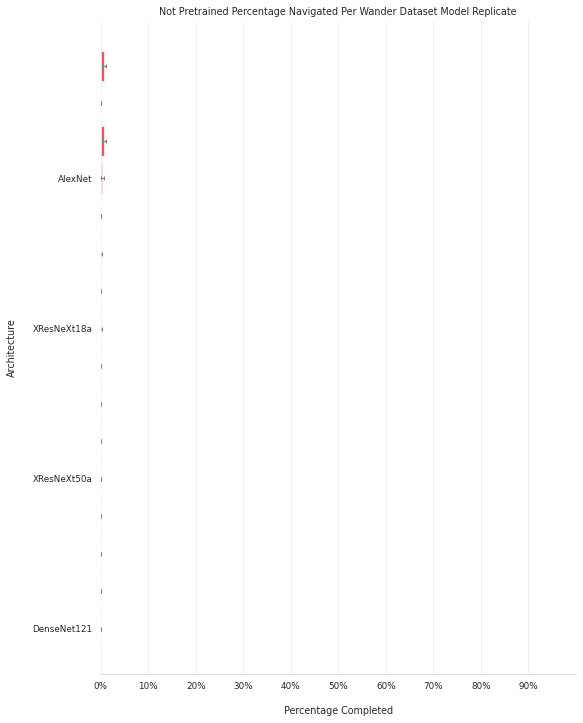

In [38]:
data_dir = "/raid/clark/summer2021/datasets/corrected-wander-full/cmd_data"

df = pd.read_csv("wander_cmd/cmd_percentage.csv", index_col=0)
columns = list(df.columns)
mazes = columns[1:-3]
df = df.assign(clean_names=list(map(get_network_name, list(df["Network"]))))
avg_valid = merge_loss_data(data_dir, df, "valid_loss", "cmd", True)
replicate_valid = merge_loss_data(data_dir, df, "valid_loss", "cmd", False)
avg_train = merge_loss_data(data_dir, df, "train_loss", "cmd", True)
replicate_train = merge_loss_data(data_dir, df, "train_loss", "cmd", False)
df = pd.merge(df, avg_valid, on="clean_names")
df = df.sort_values(by=['mean_completion'])

%load_ext autoreload
%autoreload 2
ax = plot_bars(df, "Completion")
plt.gcf().subplots_adjust(left=0.35)
ax.set_title("Not Pretrained Percentage Navigated Per Wander Dataset Model Replicate");

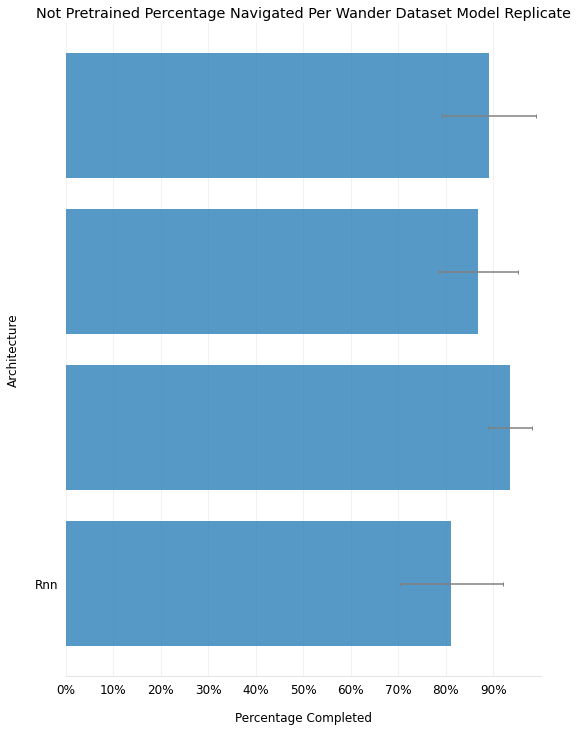

In [3]:
df = pd.read_csv("RNN/rnn_percentage.csv", index_col=0)
columns = list(df.columns)
mazes = columns[1:-3]
df = df.assign(clean_names=list(map(get_network_name, list(df["Network"]))))
avg_valid = merge_loss_data(data_dir, df, "valid_loss", "rnn", True)
replicate_valid = merge_loss_data(data_dir, df, "valid_loss", "rnn", False)
avg_train = merge_loss_data(data_dir, df, "train_loss", "rnn", True)
replicate_train = merge_loss_data(data_dir, df, "train_loss", "rnn", False)
df = pd.merge(df, avg_valid, on="clean_names")
df = df.sort_values(by=['mean_completion'])

%load_ext autoreload
%autoreload 2
ax = plot_bars(df, "Completion")
plt.gcf().subplots_adjust(left=0.35)
ax.set_title("Not Pretrained Percentage Navigated Per Wander Dataset Model Replicate");

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


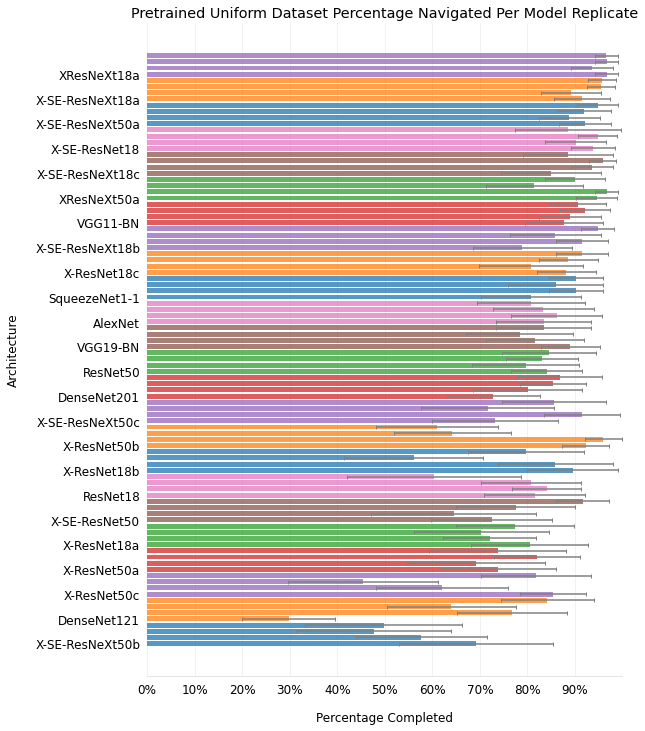

In [6]:
df = pd.read_csv("uniform_pretrained/uniform_pre_completion_results.csv", index_col=0)
columns = list(df.columns)
mazes = columns[1:-3]
df = df.assign(clean_names=list(map(get_network_name, list(df["Network"]))))
avg_valid = merge_loss_data(data_dir, df, "valid_loss", "pretrained", True)
replicate_valid = merge_loss_data(data_dir, df, "valid_loss", "pretrained", False)
avg_train = merge_loss_data(data_dir, df, "train_loss", "pretrained", True)
replicate_train = merge_loss_data(data_dir, df, "train_loss", "pretrained", False)
df = pd.merge(df, avg_valid, on="clean_names")
df = df.sort_values(by=['mean_completion'])

%load_ext autoreload
%autoreload 2
ax = plot_bars(df, "Completion")
plt.gcf().subplots_adjust(left=0.35)
ax.set_title("Pretrained Uniform Dataset Percentage Navigated Per Model Replicate");

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


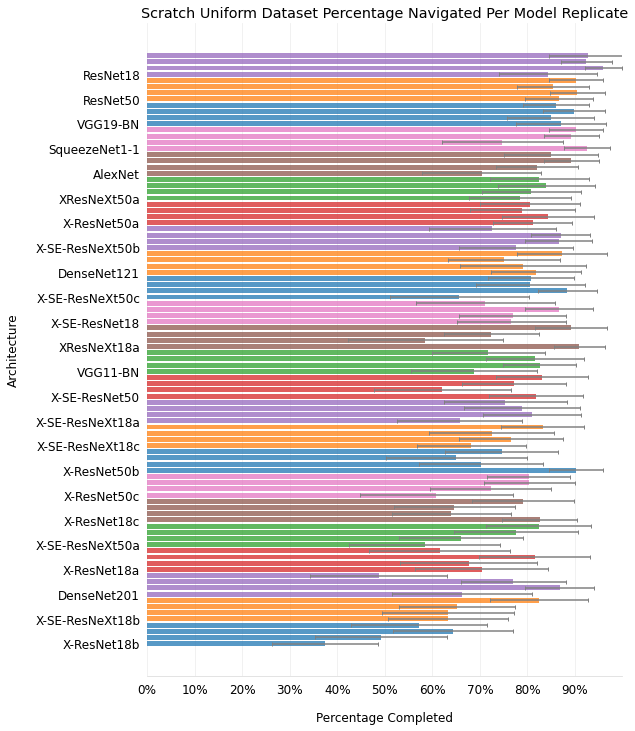

In [9]:
df = pd.read_csv("uniform_nonpre/uniform_nonpre_percentage.csv", index_col=0)
columns = list(df.columns)
mazes = columns[1:-3]
df = df.assign(clean_names=list(map(get_network_name, list(df["Network"]))))
avg_valid = merge_loss_data(data_dir, df, "valid_loss", "notpretrained", True)
replicate_valid = merge_loss_data(data_dir, df, "valid_loss", "notpretrained", False)
avg_train = merge_loss_data(data_dir, df, "train_loss", "pretrained", True)
replicate_train = merge_loss_data(data_dir, df, "train_loss", "notpretrained", False)
df = pd.merge(df, avg_valid, on="clean_names")
df = df.sort_values(by=['mean_completion'])

%load_ext autoreload
%autoreload 2
ax = plot_bars(df, "Completion")
plt.gcf().subplots_adjust(left=0.35)
ax.set_title("Scratch Uniform Dataset Percentage Navigated Per Model Replicate");

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


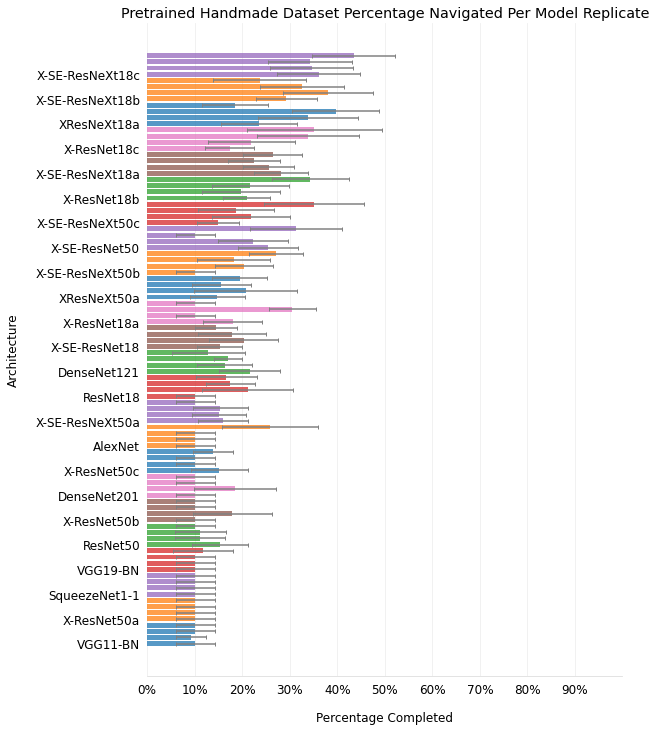

In [10]:
df = pd.read_csv("handmade_pretrained/handmade_pre_percentage.csv", index_col=0)
columns = list(df.columns)
mazes = columns[1:-3]
df = df.assign(clean_names=list(map(get_network_name, list(df["Network"]))))
avg_valid = merge_loss_data(data_dir, df, "valid_loss", "pretrained", True)
replicate_valid = merge_loss_data(data_dir, df, "valid_loss", "pretrained", False)
avg_train = merge_loss_data(data_dir, df, "train_loss", "pretrained", True)
replicate_train = merge_loss_data(data_dir, df, "train_loss", "pretrained", False)
df = pd.merge(df, avg_valid, on="clean_names")
df = df.sort_values(by=['mean_completion'])

%load_ext autoreload
%autoreload 2
ax = plot_bars(df, "Completion")
plt.gcf().subplots_adjust(left=0.35)
ax.set_title("Pretrained Handmade Dataset Percentage Navigated Per Model Replicate");

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


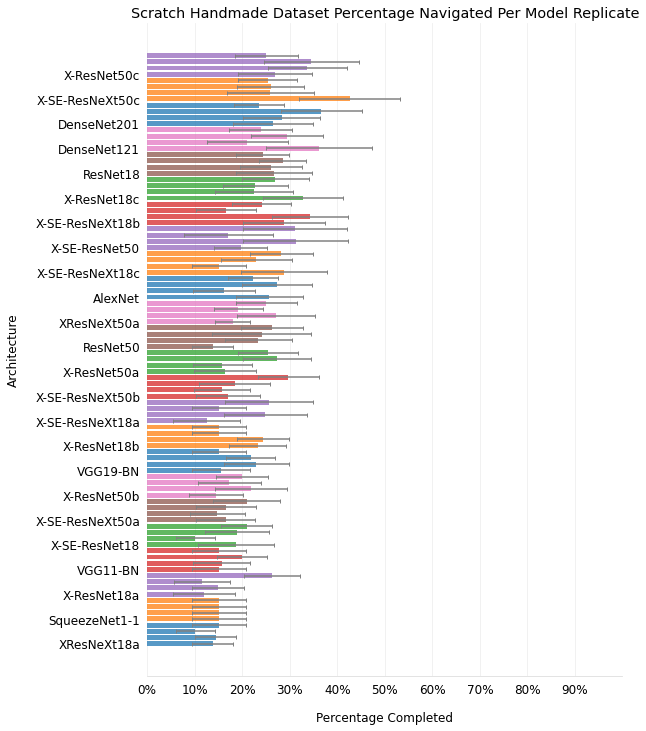

In [11]:
df = pd.read_csv("handmade_notpretrained/handmade_notpre_percentage.csv", index_col=0)
columns = list(df.columns)
mazes = columns[1:-3]
df = df.assign(clean_names=list(map(get_network_name, list(df["Network"]))))
avg_valid = merge_loss_data(data_dir, df, "valid_loss", "notpretrained", True)
replicate_valid = merge_loss_data(data_dir, df, "valid_loss", "notpretrained", False)
avg_train = merge_loss_data(data_dir, df, "train_loss", "notpretrained", True)
replicate_train = merge_loss_data(data_dir, df, "train_loss", "notpretrained", False)
df = pd.merge(df, avg_valid, on="clean_names")
df = df.sort_values(by=['mean_completion'])

%load_ext autoreload
%autoreload 2
ax = plot_bars(df, "Completion")
plt.gcf().subplots_adjust(left=0.35)
ax.set_title("Scratch Handmade Dataset Percentage Navigated Per Model Replicate");

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(array([ 70.,  75.,  80.,  85.,  90.,  95., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

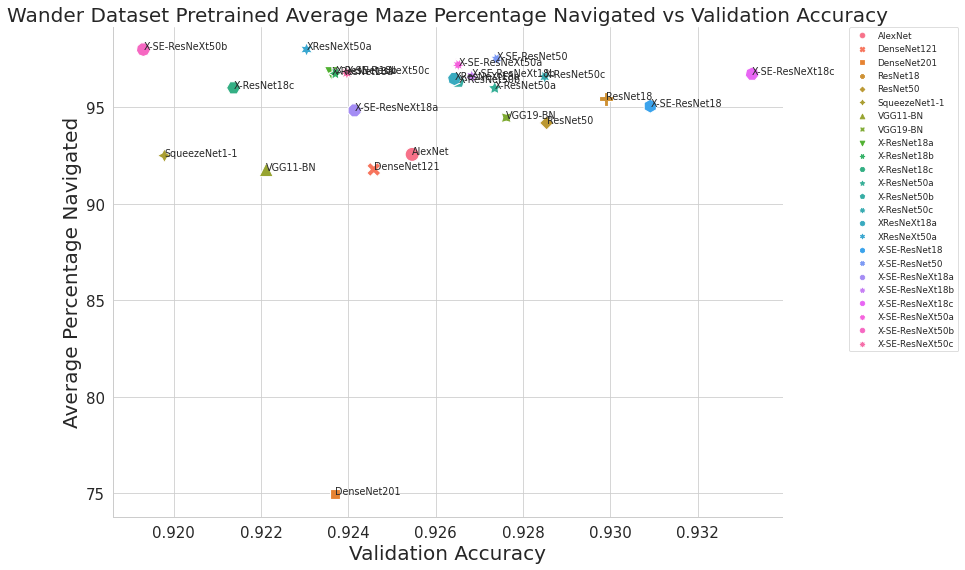

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(array([ 70.,  75.,  80.,  85.,  90.,  95., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

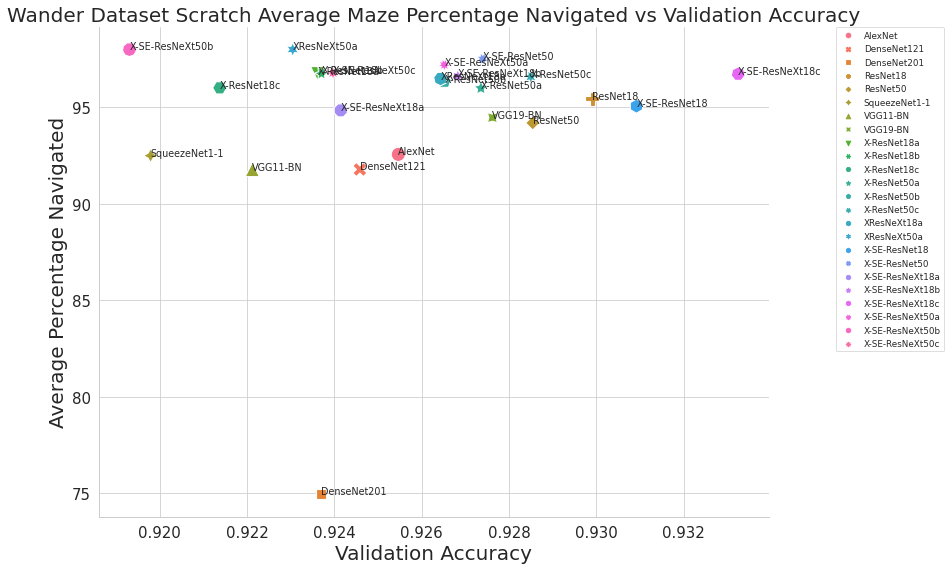

In [5]:
%load_ext autoreload
%autoreload 2

ax = plot_average_scatter(avg_accuracy)
ax.title("Wander Dataset Scratch Average Maze Percentage Navigated vs Validation Accuracy", size=20);
ax.xlabel("Validation Accuracy", size=20)
ax.ylabel("Average Percentage Navigated", size=20)
ax.xticks(size=15)
ax.yticks(size=15)

(array([80., 82., 84., 86., 88., 90., 92., 94., 96.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

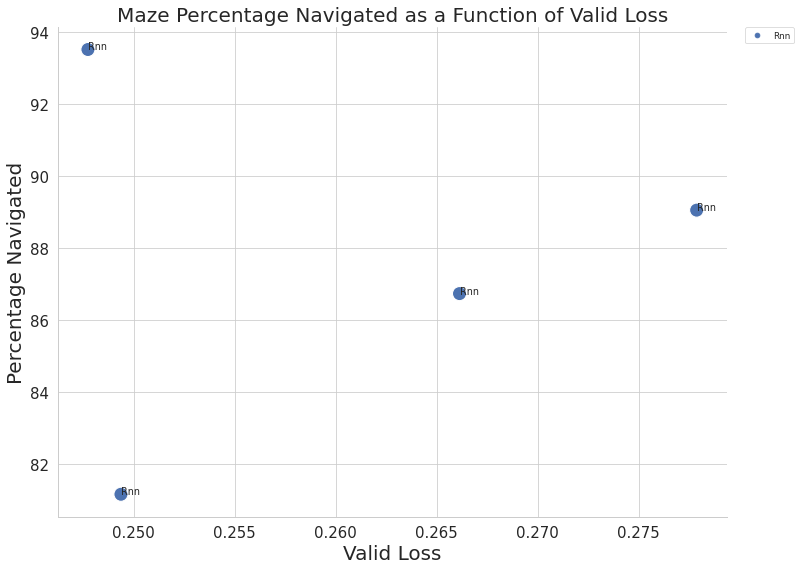

In [6]:
ax2 = plot_average_scatter(replicate_valid)
ax.title("Maze Percentage Navigated as a Function of Valid Loss", size=20);
ax.xlabel("Valid Loss", size=20)
ax.ylabel("Percentage Navigated", size=20)
ax.xticks(size=15)
ax.yticks(size=15)

(array([ 5., 10., 15., 20., 25., 30., 35., 40.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

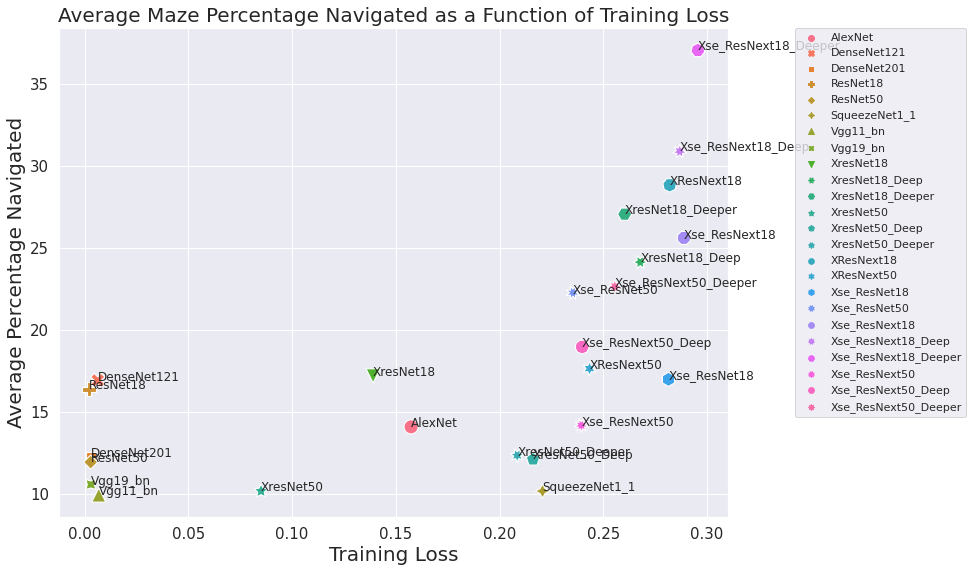

In [10]:
ax3 = plot_average_scatter(avg_train)
ax.title("Average Maze Percentage Navigated as a Function of Training Loss", size=20);
ax.xlabel("Training Loss", size=20)
ax.ylabel("Average Percentage Navigated", size=20)
ax.xticks(size=15)
ax.yticks(size=15)

(array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

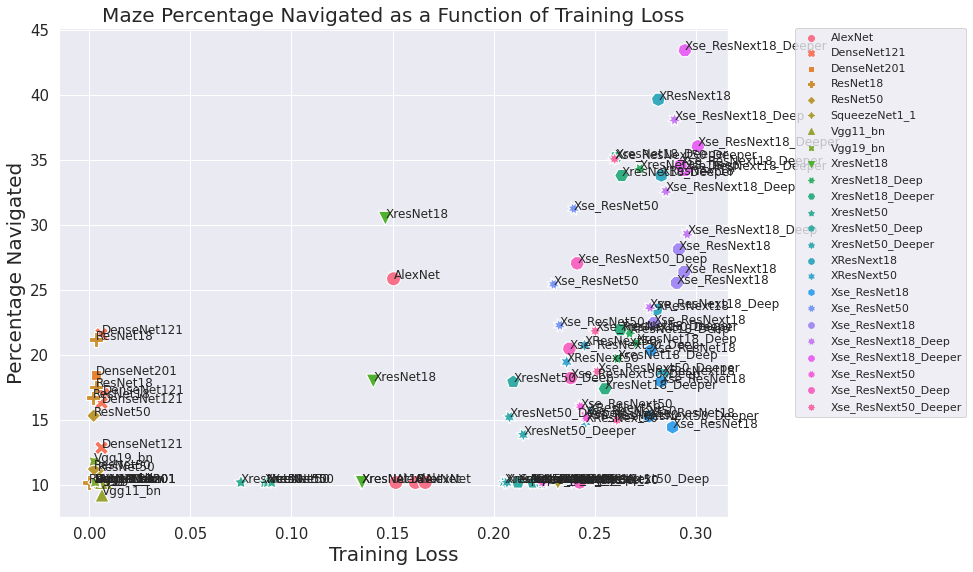

In [11]:
ax4 = plot_average_scatter(replicate_train)
ax.title("Maze Percentage Navigated as a Function of Training Loss", size=20);
ax.xlabel("Training Loss", size=20)
ax.ylabel("Percentage Navigated", size=20)
ax.xticks(size=15)
ax.yticks(size=15)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

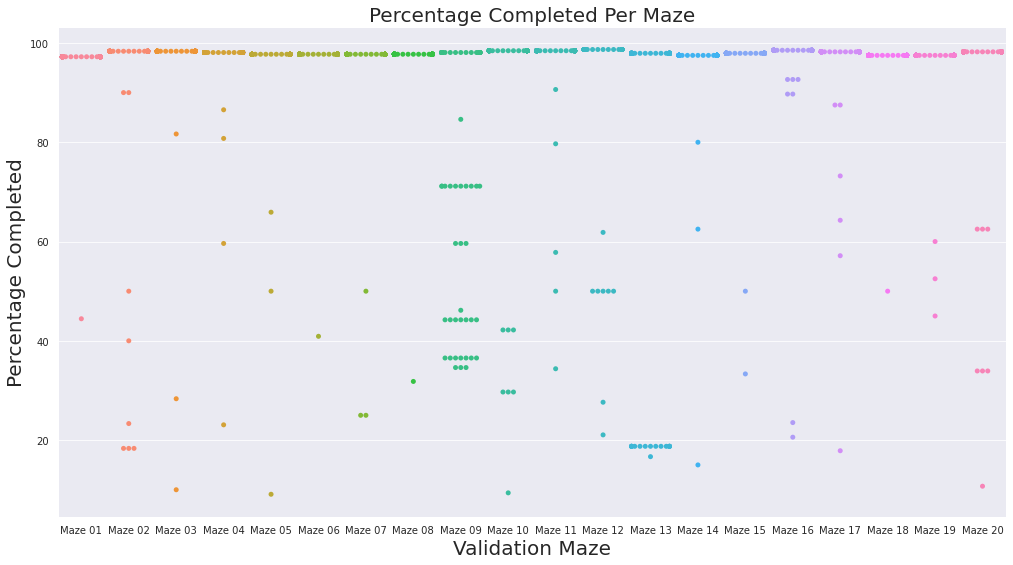

In [13]:
%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')
ax = plot_boxplot(df, mazes);
ax.title("Percentage Completed Per Maze", size=20)
ax.xlabel("Validation Maze", size=20)
ax.ylabel("Percentage Completed", size=20)
ax.xticks(size=10)
ax.yticks(size=10)

In [36]:
df = pd.read_csv("../Imitator/RNN_percentage_uniform_full_2_mazes.csv", index_col=0)
columns = list(df.columns)
mazes = columns[1:-3]

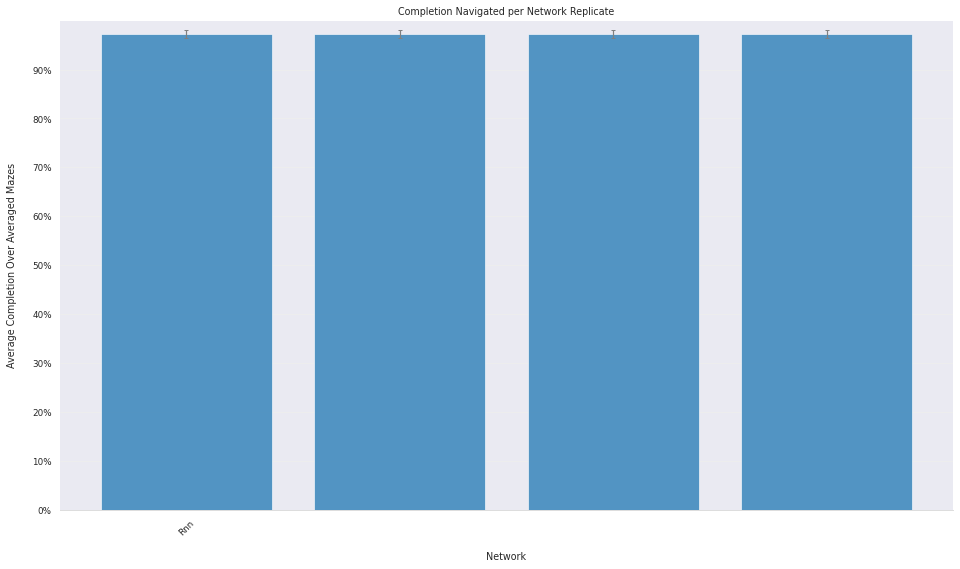

In [37]:
ax = plot_bars(df, "Completion")

# Scraps 

In [176]:
model_type = []
for m in list(df['Network']):
    if "notpretrained" in m:
        model_type.append("Non-Pretrained")
    else:
        model_type.append("Pretrained")

In [185]:
clean_names = list(map(get_network_name, list(df['Network'])))

In [186]:
df = df.assign(model_type = model_type, clean_names = clean_names)
df

,Network,maze_1,maze_2,std,mean,error,model_type,clean_name,clean_names
0,classification-alexnet-pretrained-0.pkl,34.615385,83.333333,34.448792,58.974359,47.743590,Pretrained,AlexNet,AlexNet
1,classification-alexnet-pretrained-1.pkl,34.615385,83.333333,34.448792,58.974359,47.743590,Pretrained,AlexNet,AlexNet
2,classification-alexnet-pretrained-2.pkl,21.153846,83.333333,43.967537,52.243590,60.935897,Pretrained,AlexNet,AlexNet
3,classification-alexnet-pretrained-3.pkl,34.615385,83.333333,34.448792,58.974359,47.743590,Pretrained,AlexNet,AlexNet
4,classification-densenet121-notpretrained-0.pkl,46.153846,50.000000,2.719641,48.076923,3.769231,Non-Pretrained,DenseNet121,DenseNet121
...,...,...,...,...,...,...,...,...,...
172,classification-xse_resnext50_deeper-notpretrained-3.pkl,34.615385,83.333333,34.448792,58.974359,47.743590,Non-Pretrained,Xse_ResNext50_Deeper,Xse_ResNext50_Deeper
173,classification-xse_resnext50_deeper-pretrained-0.pkl,46.153846,30.555556,11.029657,38.354701,15.286325,Pretrained,Xse_ResNext50_Deeper,Xse_ResNext50_Deeper
174,classification-xse_resnext50_deeper-pretrained-1.pkl,34.615385,19.444444,10.727475,27.029915,14.867521,Pretrained,Xse_ResNext50_Deeper,Xse_ResNext50_Deeper
175,classification-xse_resnext50_deeper-pretrained-2.pkl,98.076923,27.777778,49.709002,62.927350,68.893162,Pretrained,Xse_ResNext50_Deeper,Xse_ResNext50_Deeper


# Scatter Plot Code

In [1]:
clean_names = list(map(get_network_name, list(pretrained_df['Network'])))

NameError: name 'get_network_name' is not defined

In [104]:
pretrained_df = pretrained_df.assign(clean_names = clean_names)

In [35]:
data_dir = "/raid/clark/summer2021/datasets/wander-full/data"

In [168]:
# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()

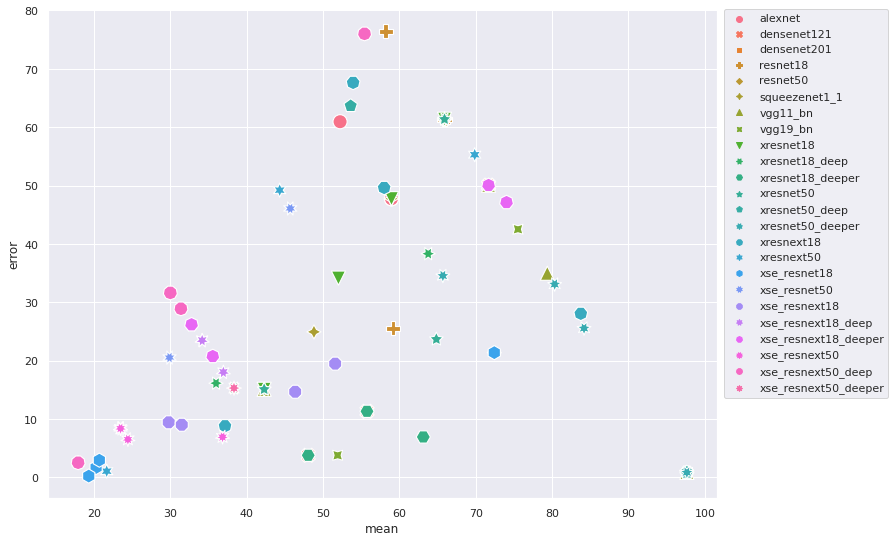

In [63]:
fig = plt.gcf()
fig.set_size_inches(12, 9)
sns.scatterplot(data=pretrained_df, x="mean", y="error", hue="Network", style="Network", s=200)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)

In [110]:
len(list(set(pretrained_df['clean_names'])))

24

In [112]:
colors = get_colors(24)

In [130]:
sns_colors = list(sns.color_palette())

color_labels = []
for i in range(24 + 1):
    color = sns_colors[i % len(sns_colors)]
    for i in range(4):
        color_labels.append(color)
color_labels;

(0.0, 100.0)

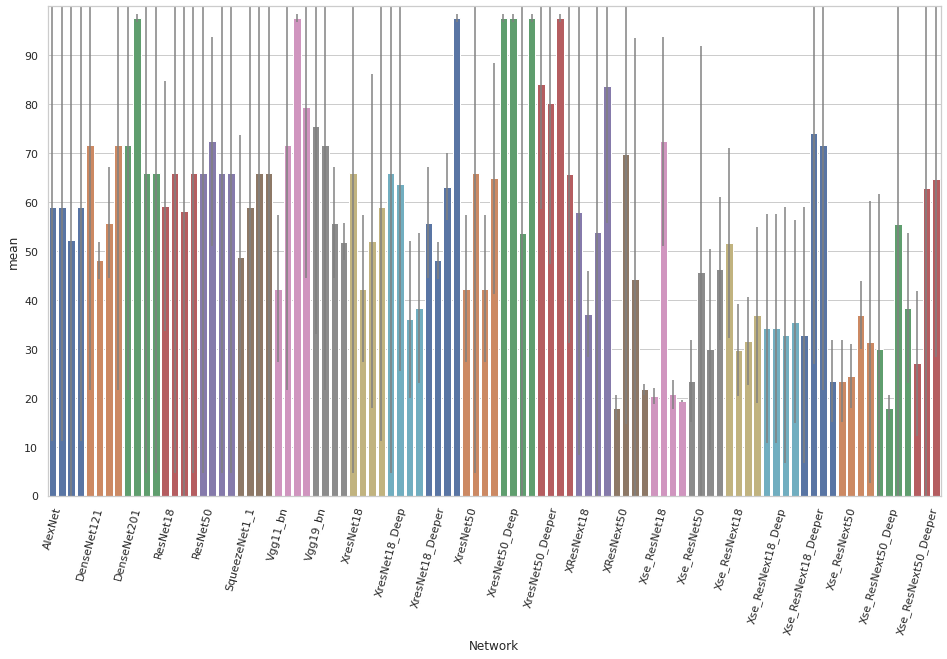

In [174]:
fig = plt.gcf()
fig.set_size_inches(16, 9)
sns.set_theme(style="whitegrid")

ci_bounds = get_error(pretrained_df)

label_names = list(pretrained_df["clean_names"])
sparse_labels = []
for i in range(0, len(label_names)):
    if i % 4 == 0:
        sparse_labels.append(clean_names[i])
    else:
        sparse_labels.append("")

ax = sns.barplot(
    x="Network",
    y="mean",
    data=pretrained_df,
    palette=color_labels,
    yerr=ci_bounds,
    ecolor="grey",
#     saturation=1
)
ax.set_xticklabels(labels=sparse_labels, rotation=75)
ax.set_yticks(np.arange(0, 100, 10))
ax.set_ylim(bottom=0.0, top=100.0)

In [28]:
avg_df = merge_loss_data(data_dir, pretrained_df, "valid_loss", clean_names, True)
ax = plot_average_scatter(avg_df)
ax.set_title("Averaged Steps Taken Over Valid Loss Per Model")
ax.set_xlabel("Valid Loss")

ValueError: Length of values (0) does not match length of index (24)

In [36]:
training_losses = []
for c in csvs:
    df = pandas.read_csv(data_dir + "/" + c)
    if len(df) == 0:
        training_losses.append(0.0)
    else:
        training_losses.append(min(df["valid_loss"]))
training_losses

[]

In [32]:
losses

[]

In [31]:
data_files = os.listdir(data_dir)
data_files.sort()
csvs = list(filter(get_csv, data_files))
losses = get_losses(csvs, data_dir, "valid_loss")
means = pretrained_df['mean']
names = clean_names    
   
# losses = np.array(losses).reshape(-1,4).mean(axis=1)
# means = np.array(means).reshape(-1,4).mean(axis=1)
# names = list(set(clean_names))

# df = pandas.DataFrame()
# df = df.assign(Network = names)
# df = df.assign(losses = losses)
# df = df.assign(mean_steps = means)

In [16]:
np.array(losses).reshape(-1,4).mean(axis=1)

ValueError: cannot reshape array of size 183 into shape (4)